In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
base = pd.read_csv('../Bases/Criados/5_plano_cartesiano.csv')

##### Quantidade de instâncias de cada classe

In [3]:
np.unique(base['Q06306'], return_counts=True)

(array([1., 2.]), array([ 1663, 22655]))

<Axes: xlabel='Q06306', ylabel='count'>

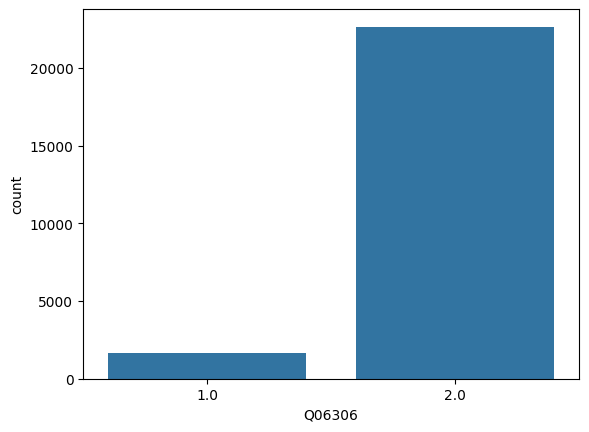

In [4]:
sns.countplot(x = base['Q06306'])

##### **Tratamento de dados categóricos**

In [5]:
string_columns = base.select_dtypes(include='object').columns

print("Colunas com valores string:")
print(string_columns)

Colunas com valores string:
Index(['chave_pessoa', 'Dor_peito', 'faixa_imc'], dtype='object')


In [6]:
base[["faixa_imc"]]

,faixa_imc
0,Sobrepeso
1,Obesidade Grau I
2,Obesidade Grau II
3,Sobrepeso
4,Sobrepeso
...,...
24313,Peso normal
24314,Peso normal
24315,Peso normal
24316,Sobrepeso


In [7]:
base[["faixa_imc"]]

,faixa_imc
0,Sobrepeso
1,Obesidade Grau I
2,Obesidade Grau II
3,Sobrepeso
4,Sobrepeso
...,...
24313,Peso normal
24314,Peso normal
24315,Peso normal
24316,Sobrepeso


In [8]:
# Mapeamento explícito
mapeamento = {
    "Abaixo do peso": 0,
    "Peso normal": 1,
    "Sobrepeso": 2,
    "Obesidade Grau I": 3,
    "Obesidade Grau II": 4,
    "Obesidade Grau III": 5
}

# Aplicando o mapeamento
base["faixa_imc"] = base["faixa_imc"].replace(mapeamento).astype(int)

# Visualizando resultado
base[["faixa_imc"]]

C:\Users\bkser\AppData\Local\Temp\ipykernel_36340\1027575936.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  base["faixa_imc"] = base["faixa_imc"].replace(mapeamento).astype(int)


,faixa_imc
0,2
1,3
2,4
3,2
4,2
...,...
24313,1
24314,1
24315,1
24316,2


#### OneHotEncoder (binarizar atributos não ordinais)

In [9]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

Dor_peito

In [10]:
print(base["Dor_peito"].unique())

['Não sente dor' 'Acima ou no meio do peito' 'Braço esquerdo'
 'Abaixo do peito' 'Outro lugar']


In [11]:
cols_onehot_encode = ['Dor_peito']
# Inicializar o OneHotEncoder (sparse_output=False retorna um array denso)
onehot = OneHotEncoder(sparse_output=False)

# Aplicar o OneHotEncoder apenas nas colunas categóricas
df_onehot = onehot.fit_transform(base[cols_onehot_encode])

# Obter os novos nomes das colunas após a codificação
nomes_das_colunas = onehot.get_feature_names_out(cols_onehot_encode)

# Criar um DataFrame com os dados codificados e as novas colunas
df_onehot = pd.DataFrame(df_onehot, columns=nomes_das_colunas)

# Combinar as colunas codificadas com as colunas que não foram transformadas
base_encoded= pd.concat([df_onehot, base.drop(columns=cols_onehot_encode)], axis=1)

In [12]:
base = base.drop('Dor_peito', axis=1)

In [13]:
base_encoded

,Dor_peito_Abaixo do peito,Dor_peito_Acima ou no meio do peito,Dor_peito_Braço esquerdo,Dor_peito_Não sente dor,Dor_peito_Outro lugar,V0001,V0024,UPA_PNS,V0006_PNS,C00301,...,Avaliacao_plano,FaixaTempoExercicio,Inicio_tabagismo,Tempo_parou_fumar,Intensidade_fumo,Quant_doses_alcool_semanal,AusenciaTrabalhoPorDC,Doenca_limitante,imc,faixa_imc
0,0.0,0.0,0.0,1.0,0.0,21,2110011,210003272,2,1.0,...,0,1,1,6,0.0,0,0.0,0.0,25.88,2
1,0.0,0.0,0.0,1.0,0.0,21,2110011,210003272,4,1.0,...,0,0,0,0,0.0,0,0.0,1.0,34.05,3
2,0.0,0.0,0.0,1.0,0.0,21,2110011,210003272,5,1.0,...,2,1,0,6,0.0,3,0.0,2.0,36.89,4
3,0.0,0.0,0.0,1.0,0.0,21,2110011,210003272,7,1.0,...,2,0,1,6,0.0,2,0.0,2.0,28.38,2
4,0.0,0.0,0.0,1.0,0.0,21,2110011,210003272,8,2.0,...,0,1,0,0,0.0,0,0.0,2.0,28.96,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24313,0.0,1.0,0.0,0.0,0.0,53,5310220,530044434,5,1.0,...,0,0,0,0,0.0,2,0.0,1.0,24.84,1
24314,0.0,0.0,0.0,1.0,0.0,53,5310220,530044434,6,2.0,...,0,0,0,0,0.0,0,0.0,2.0,23.62,1
24315,0.0,0.0,0.0,1.0,0.0,53,5310220,530044434,9,2.0,...,0,0,2,1,7.0,1,0.0,1.0,22.32,1
24316,0.0,0.0,0.0,1.0,0.0,53,5310220,530044434,10,2.0,...,0,0,3,1,7.0,3,0.0,0.0,25.51,2


In [14]:
base = base.drop(columns=['chave_pessoa','V0024', 'UPA_PNS', 'V0006_PNS', 'C00301'])  

In [15]:
string_columns = base.select_dtypes(include='object').columns

print("Colunas com valores string:")
print(string_columns)

Colunas com valores string:
Index([], dtype='object')


In [16]:
base.to_csv('../Bases/Criados/6_base_codificacao.csv', index=False)

##### **Separação do dataset em variáveis independentes (X_prev) e dependentes (y_classe)**

In [17]:
X_prev = base_encoded.drop(columns=['Q06306'])  # Todas as colunas exceto a target
y_classe = base_encoded['Q06306']               # A coluna target

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_prev

,Dor_peito_Abaixo do peito,Dor_peito_Acima ou no meio do peito,Dor_peito_Braço esquerdo,Dor_peito_Não sente dor,Dor_peito_Outro lugar,V0001,V0024,UPA_PNS,V0006_PNS,C00301,...,Avaliacao_plano,FaixaTempoExercicio,Inicio_tabagismo,Tempo_parou_fumar,Intensidade_fumo,Quant_doses_alcool_semanal,AusenciaTrabalhoPorDC,Doenca_limitante,imc,faixa_imc
0,0.0,0.0,0.0,1.0,0.0,21,2110011,210003272,2,1.0,...,0,1,1,6,0.0,0,0.0,0.0,25.88,2
1,0.0,0.0,0.0,1.0,0.0,21,2110011,210003272,4,1.0,...,0,0,0,0,0.0,0,0.0,1.0,34.05,3
2,0.0,0.0,0.0,1.0,0.0,21,2110011,210003272,5,1.0,...,2,1,0,6,0.0,3,0.0,2.0,36.89,4
3,0.0,0.0,0.0,1.0,0.0,21,2110011,210003272,7,1.0,...,2,0,1,6,0.0,2,0.0,2.0,28.38,2
4,0.0,0.0,0.0,1.0,0.0,21,2110011,210003272,8,2.0,...,0,1,0,0,0.0,0,0.0,2.0,28.96,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24313,0.0,1.0,0.0,0.0,0.0,53,5310220,530044434,5,1.0,...,0,0,0,0,0.0,2,0.0,1.0,24.84,1
24314,0.0,0.0,0.0,1.0,0.0,53,5310220,530044434,6,2.0,...,0,0,0,0,0.0,0,0.0,2.0,23.62,1
24315,0.0,0.0,0.0,1.0,0.0,53,5310220,530044434,9,2.0,...,0,0,2,1,7.0,1,0.0,1.0,22.32,1
24316,0.0,0.0,0.0,1.0,0.0,53,5310220,530044434,10,2.0,...,0,0,3,1,7.0,3,0.0,0.0,25.51,2


In [20]:
y_classe

0        2.0
1        2.0
2        2.0
3        2.0
4        2.0
        ... 
24313    2.0
24314    2.0
24315    2.0
24316    2.0
24317    2.0
Name: Q06306, Length: 24318, dtype: float64

In [21]:
y_classe.shape

(24318,)

In [22]:
#X_train_ds, X_test_ds, y_train_ds, y_test_ds = train_test_split(X, y, test_size=0.3, random_state=123, shuffle=True, stratify=y)
X_treino, X_teste, y_treino, y_teste = train_test_split(X_prev, y_classe, test_size = 0.20, random_state = 42)

In [23]:
X_treino.shape

(19454, 55)

In [24]:
X_teste.shape

(4864, 55)

In [25]:
X_teste

,Dor_peito_Abaixo do peito,Dor_peito_Acima ou no meio do peito,Dor_peito_Braço esquerdo,Dor_peito_Não sente dor,Dor_peito_Outro lugar,V0001,V0024,UPA_PNS,V0006_PNS,C00301,...,Avaliacao_plano,FaixaTempoExercicio,Inicio_tabagismo,Tempo_parou_fumar,Intensidade_fumo,Quant_doses_alcool_semanal,AusenciaTrabalhoPorDC,Doenca_limitante,imc,faixa_imc
1227,0.0,0.0,0.0,1.0,0.0,21,2152011,210062155,4,3.0,...,0,0,0,0,0.0,0,0.0,0.0,24.67,1
2842,0.0,0.0,0.0,1.0,0.0,22,2210011,220034829,11,1.0,...,0,1,0,0,0.0,0,0.0,1.0,27.06,2
20674,0.0,1.0,0.0,0.0,0.0,51,5120010,510076834,10,1.0,...,0,0,0,0,0.0,0,0.0,1.0,22.94,1
11811,0.0,0.0,0.0,1.0,0.0,26,2651023,260044234,4,1.0,...,0,0,2,1,7.0,0,0.0,1.0,27.58,2
3455,0.0,0.0,0.0,1.0,0.0,22,2251011,220011820,7,1.0,...,0,0,1,1,7.0,0,0.0,0.0,21.33,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16799,0.0,0.0,0.0,1.0,0.0,29,2920011,290107154,6,1.0,...,1,1,0,0,0.0,3,0.0,0.0,27.68,2
17682,0.0,1.0,0.0,0.0,0.0,29,2954021,290044260,4,1.0,...,0,0,2,1,3.0,0,0.0,2.0,22.49,1
5638,0.0,0.0,0.0,1.0,0.0,23,2352011,230083700,11,1.0,...,0,1,0,0,0.0,0,0.0,0.0,28.63,2
10305,0.0,0.0,0.0,1.0,0.0,25,2553022,250075830,15,1.0,...,0,0,0,0,0.0,2,0.0,0.0,25.71,2


In [26]:
y_treino

10121    2.0
10290    1.0
3461     2.0
977      2.0
18761    2.0
        ... 
21575    2.0
5390     2.0
860      2.0
15795    2.0
23654    2.0
Name: Q06306, Length: 19454, dtype: float64

In [27]:
y_teste

1227     2.0
2842     2.0
20674    2.0
11811    2.0
3455     2.0
        ... 
16799    2.0
17682    2.0
5638     2.0
10305    2.0
4058     2.0
Name: Q06306, Length: 4864, dtype: float64

In [28]:
# Junta X e y da base de treino
base_treino = pd.concat([X_treino, y_treino], axis=1)

# Junta X e y da base de teste
base_teste = pd.concat([X_teste, y_teste], axis=1)

In [29]:
base_treino.to_csv("../Bases/Criados/base_treino.csv", index=False)
base_teste.to_csv("../Bases/Criados/base_teste.csv", index=False)